# FCA

Technical Challenge for Data Science Candidates

This workbook loads a pickle file from the prior notebook.

Visualisation

In [1]:
import numpy as np
import pandas as pd
import math
import json

from os import path

import scipy.stats as st
import statsmodels as sm
import statsmodels.api as smi

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

from cycler import cycler
import matplotlib.pyplot as plt
import seaborn as sns

pd.__version__

'0.24.2'

In [58]:
# If you turn this feature on, you can display each result as it happens.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# this is the local Utility module and it reloaded each time.
from fca import Utility

In [3]:
%load_ext autoreload
%autoreload 1
%aimport fca

In [4]:
# My utility singleton.
i0 = Utility.instance()

## Visualisations

There is a lot of data, take a sample.

In [19]:
df2 = pd.read_pickle("coded.pickle")
df2 = pd.read_pickle("scaled.pickle")

y = df2.y

X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.2)

In [56]:
# Default case is take a small sample

X = X_test
y = y_test

In [64]:
# Another variant is to check when the outcome is true
# This can trap conditioned outcomes
set(df2.y)
X = df2[df2.y > 0]
y = df2.y

{-0.35630931983292696, 2.806550220097805}

In [65]:
X.head()
X.info()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,0.093650,-0.757982,-1.926061,-1.753925,1.945327,0.942127,-0.452491,1.31827,0.762558,-0.718834,...,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168,2.80655
83,0.861322,-0.479781,-0.283741,1.054464,1.945327,0.942127,-0.452491,1.31827,0.762558,-0.718834,...,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168,2.80655
88,0.861322,1.467630,-0.283741,-0.817795,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,...,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168,2.80655
129,0.093650,1.467630,-0.283741,0.586399,1.945327,0.942127,-0.452491,1.31827,0.762558,-0.718834,...,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168,2.80655
139,0.477486,-0.757982,-0.283741,-0.817795,1.945327,0.942127,-0.452491,1.31827,0.762558,-0.718834,...,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.71246,0.33168,2.80655


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4640 entries, 75 to 41186
Data columns (total 21 columns):
age               4640 non-null float64
job               4640 non-null float64
marital           4640 non-null float64
education         4640 non-null float64
default           4640 non-null float64
housing           4640 non-null float64
loan              4640 non-null float64
contact           4640 non-null float64
month             4640 non-null float64
day_of_week       4640 non-null float64
duration          4640 non-null float64
campaign          4640 non-null float64
pdays             4640 non-null float64
previous          4640 non-null float64
poutcome          4640 non-null float64
emp.var.rate      4640 non-null float64
cons.price.idx    4640 non-null float64
cons.conf.idx     4640 non-null float64
euribor3m         4640 non-null float64
nr.employed       4640 non-null float64
y                 4640 non-null float64
dtypes: float64(21)
memory usage: 797.5 KB


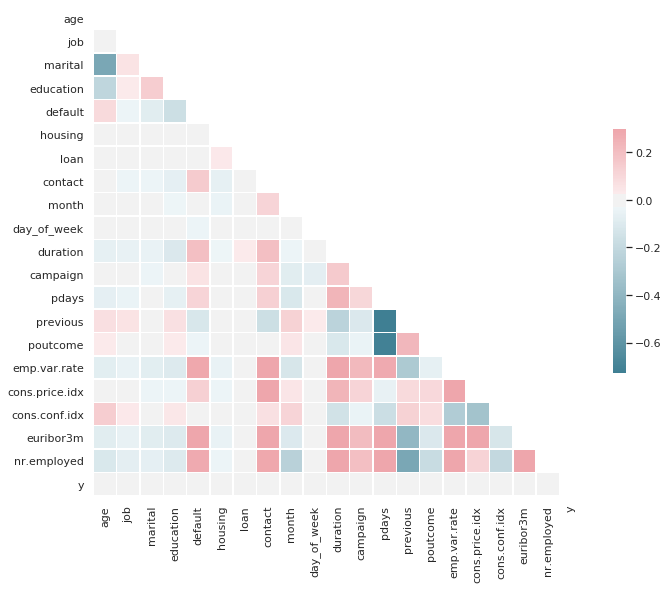

In [67]:
## Correlations

sns.set(style="white")

# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

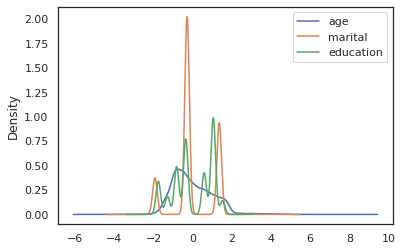

In [68]:
# Check the age shape

df2[['age', 'marital', 'education']].plot.density()

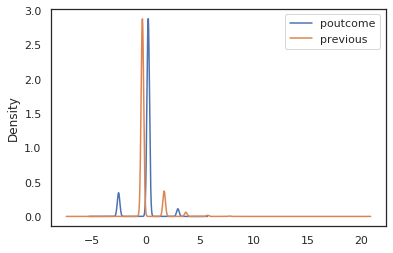

In [41]:
# These seem to lagged identical
df2[['poutcome', 'previous']].plot.density()

### euribor3m cluster

These seem to be related.

Looking at these. It might be the future-value of the loan at the time the loanee applied. 
The most information would then be in the price

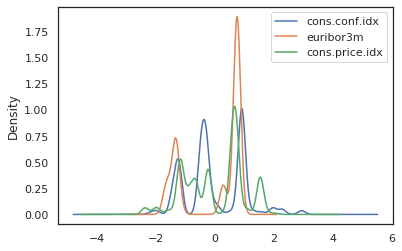

In [44]:
df2[['cons.conf.idx', 'euribor3m', 'cons.price.idx']].plot.density()

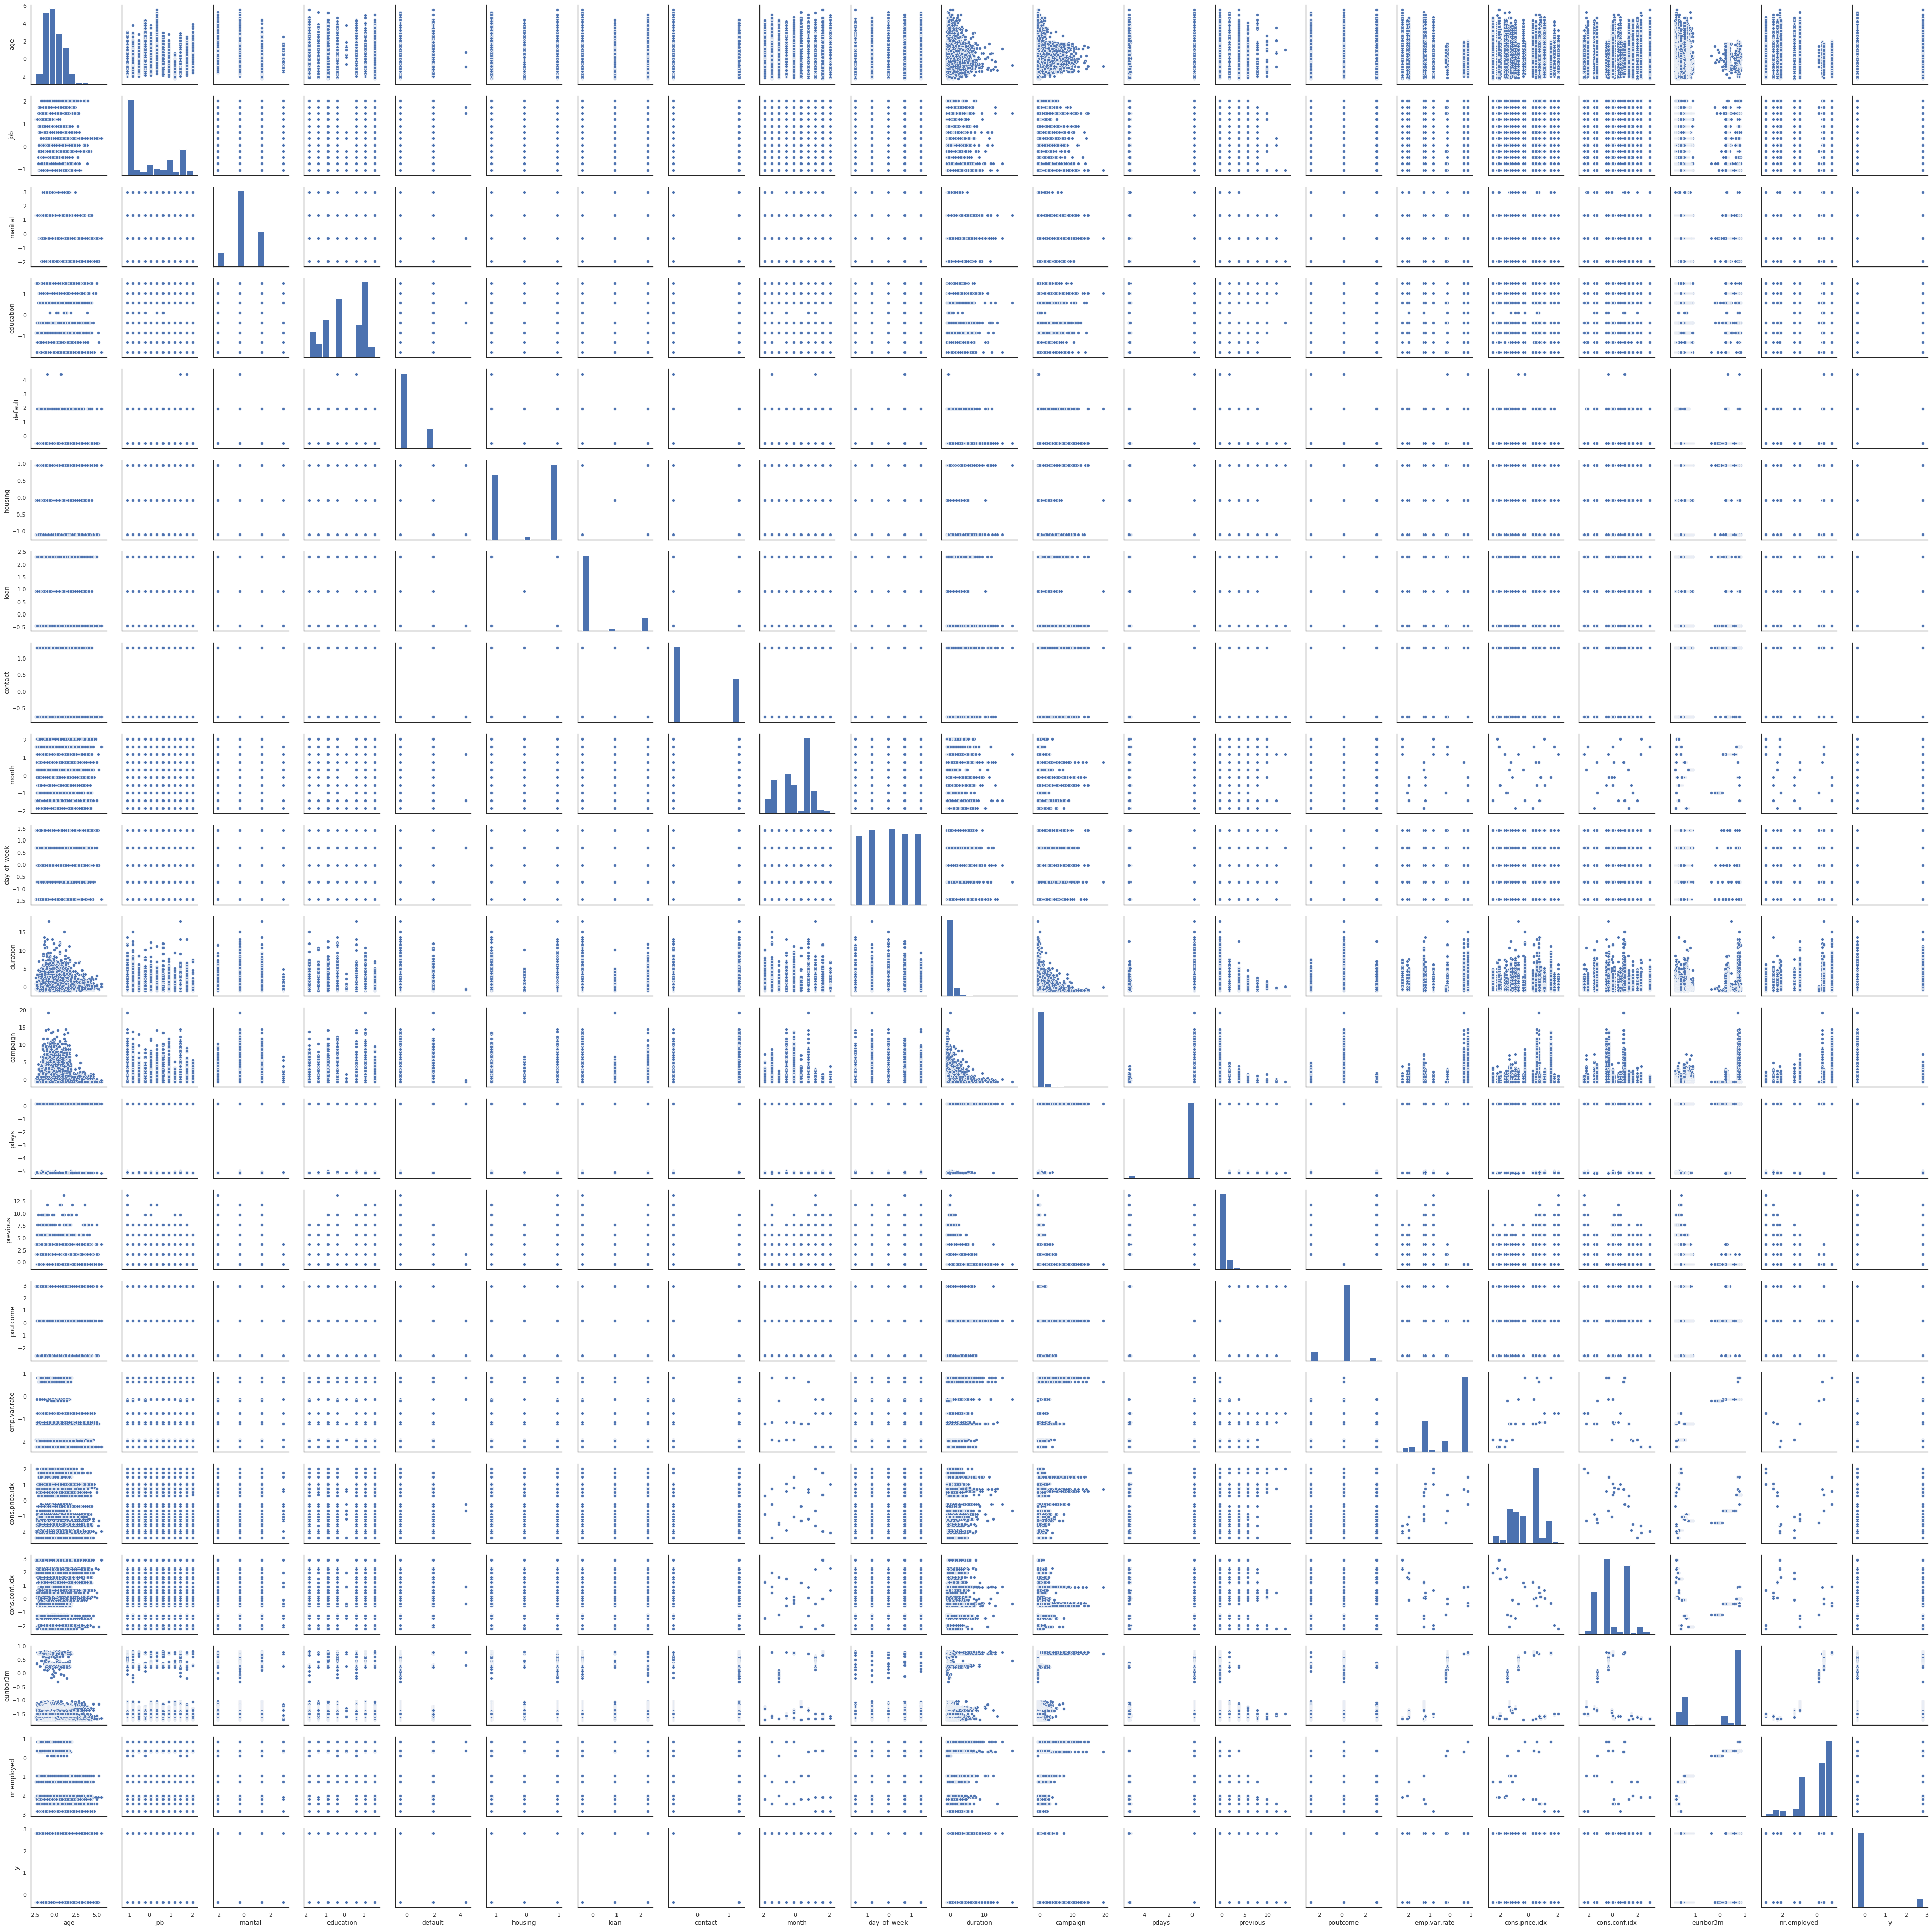

In [46]:
# A very time-consuming pair plot

sns.pairplot(df2)

In [31]:
df2['marital'];

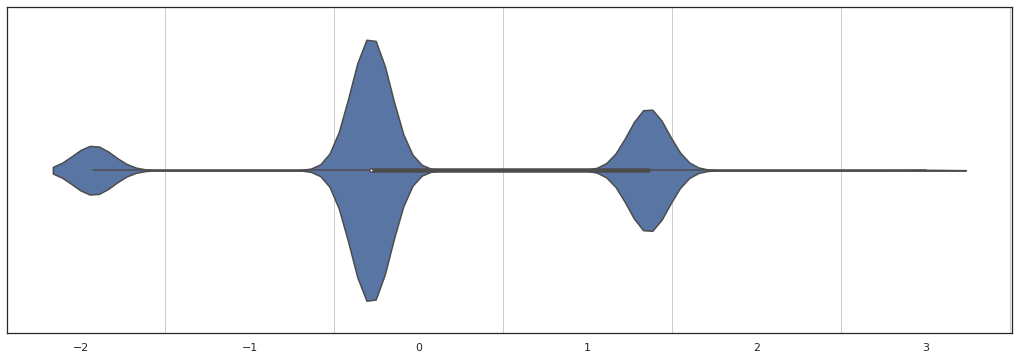

In [40]:
# Some violin plots

from matplotlib.ticker import AutoMinorLocator

fig = plt.figure(figsize=(18,6))

# ax1 = sns.violinplot(x=['marital', "y"], data=df2, hue='modelLine')
ax1 = sns.violinplot(x=['marital', 'age'], data=df2)
ax1 = sns.violinplot(x=['age'], data=df2)

ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))

ax1.grid(which='minor', axis='x', linewidth=1)

In [53]:
math.floor(math.log(X.shape[1], 2))

4